
### Project : Prudential Life Insurance Assessment - Final Project<br/>
### Authors : Ibrahim Sobh & Viet-Cuong Nghiem<br/>
### Course  : AI Project Methodlogy

### Dataset  : https://www.kaggle.com/c/prudential-life-insurance-assessment


Prudential, one of the largest issuers of life insurance in the USA.

In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry


In [1]:
%load_ext autoreload
%autoreload 2
import sys
if not ".." in sys.path:
    sys.path.append('..')

Importing necessary packages and data

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format
plt.style.use('fivethirtyeight')

In [3]:
train=pd.read_csv('../../data/train/train.csv')
test=pd.read_csv('../../data/test/test.csv')

## Data Description

* train.csv - the training set, contains the Response values
* test.csv - the test set, you must predict the Response variable for all rows in this file


* Id :	A unique identifier associated with an application.
* Product_Info_1-7 :	A set of normalized variables relating to the product applied for
* Ins_Age :	Normalized age of applicant
* Ht :	Normalized height of applicant
* Wt :	Normalized weight of applicant
* BMI :	Normalized BMI of applicant
* Employment_Info_1-6 :	A set of normalized variables relating to the employment history of the applicant.
* InsuredInfo_1-6 :	A set of normalized variables providing information about the applicant.
* Insurance_History_1-9 :	A set of normalized variables relating to the insurance history of the applicant.
* Family_Hist_1-5 :	A set of normalized variables relating to the family history of the applicant.
* Medical_History_1-41 :	A set of normalized variables relating to the medical history of the applicant.
* Medical_Keyword_1-48 :	A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
* Response :	This is the target variable, an ordinal variable relating to the final decision associated with an application

In [4]:
train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.077,2,1,1,0.642,0.582,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.077,2,3,1,0.060,0.600,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.077,2,3,1,0.030,0.745,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487,2,3,1,0.164,0.673,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.231,2,3,1,0.418,0.655,...,0,0,0,0,0,0,0,0,0,8


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


#  Missing Value Analysis

In [6]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt
    #return(np.transpose(tt))

In [7]:
#checking missing value percentage in train data
missing_data(train)['Percent'].sort_values(ascending=False)

Medical_History_10   99.062
Medical_History_32   98.136
Medical_History_24   93.599
Medical_History_15   75.101
Family_Hist_5        70.411
                      ...  
Medical_History_6     0.000
Medical_History_5     0.000
Medical_History_4     0.000
Medical_History_3     0.000
Response              0.000
Name: Percent, Length: 128, dtype: float64

In [8]:
#checking missing value percentage in train data
missing_data(test)['Percent'].sort_values(ascending=False)

Medical_History_10   98.983
Medical_History_32   98.224
Medical_History_24   94.030
Medical_History_15   75.204
Family_Hist_5        68.930
                      ...  
Medical_History_6     0.000
Medical_History_5     0.000
Medical_History_4     0.000
Medical_History_3     0.000
Medical_Keyword_48    0.000
Name: Percent, Length: 127, dtype: float64

Dropping columns which has more than 75% missing value

In [9]:
train=train[train.columns[train.isnull().mean() <= 0.75]]

In [10]:
test=test[test.columns[test.isnull().mean() <= 0.75]]

In [11]:
train.isnull().sum().sort_values(ascending=False)

Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
                       ...  
Medical_History_6          0
Medical_History_5          0
Medical_History_4          0
Medical_History_3          0
Response                   0
Length: 124, dtype: int64

In [12]:
test.isnull().sum().sort_values(ascending=False)

Family_Hist_5          13624
Family_Hist_3          11064
Family_Hist_2           9880
Insurance_History_5     8105
Family_Hist_4           6677
                       ...  
Medical_History_6          0
Medical_History_5          0
Medical_History_4          0
Medical_History_3          0
Medical_Keyword_48         0
Length: 123, dtype: int64

**Taking null value column names**

In [13]:
list_train=train.columns[train.isna().any()].tolist()

In [14]:
list_test=test.columns[test.isna().any()].tolist()

**Printing column names and data types  which has null values**

In [15]:
for i in range(0,len(list_train)):
    print('column name: ',list_train[i],' Dtype:',train[list_train[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


In [16]:
for i in range(0,len(list_test)):
    print('column name: ',list_test[i],' Dtype:',train[list_test[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


**Filling Null Values With Mean**

In [17]:
for column in list_train:
    train[column].fillna(train[column].mean(), inplace=True)

In [18]:
for column in list_test:
    test[column].fillna(test[column].mean(), inplace=True)

In [19]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 124 entries, Id to Response
dtypes: float64(14), int64(109), object(1)
memory usage: 56.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 123 entries, Id to Medical_Keyword_48
dtypes: float64(14), int64(108), object(1)
memory usage: 18.5+ MB


## Label Encoding

In [20]:
obj_train=list(train.select_dtypes(include=['object']).columns)
obj_test=list(test.select_dtypes(include=['object']).columns)

In [21]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()
train.loc[:,obj_train]=le.fit_transform(train[obj_train])
test.loc[:,obj_test]=le.fit(test[obj_test])

In [22]:
train_encoded=train.copy()
train_encoded

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16.000,10,0.077,2,1,1,0.642,0.582,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0.000,26,0.077,2,3,1,0.060,0.600,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18.000,26,0.077,2,3,1,0.030,0.745,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17.000,10,0.487,2,3,1,0.164,0.673,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15.000,26,0.231,2,3,1,0.418,0.655,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,14.000,10,0.231,2,3,1,0.075,0.709,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,16.000,26,0.231,2,3,1,0.433,0.800,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,18.000,26,0.077,2,3,1,0.104,0.745,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,15.000,10,0.231,2,3,1,0.507,0.691,...,1,0,0,0,0,0,0,0,0,8


#  **Analysing features**

* **Weight**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wt', ylabel='Density'>

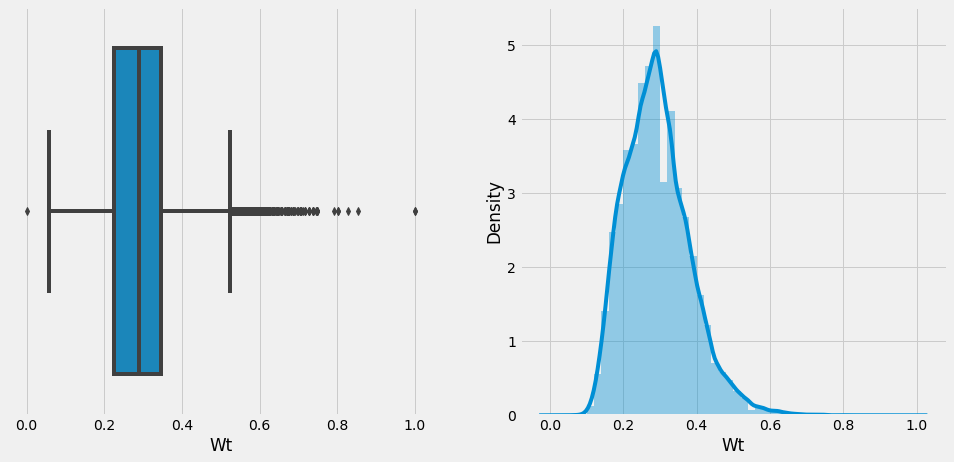

In [23]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Wt', data=train,  orient='v' , ax=axes[0])
sns.distplot(train['Wt'],  ax=axes[1])

* **Height**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ht', ylabel='Density'>

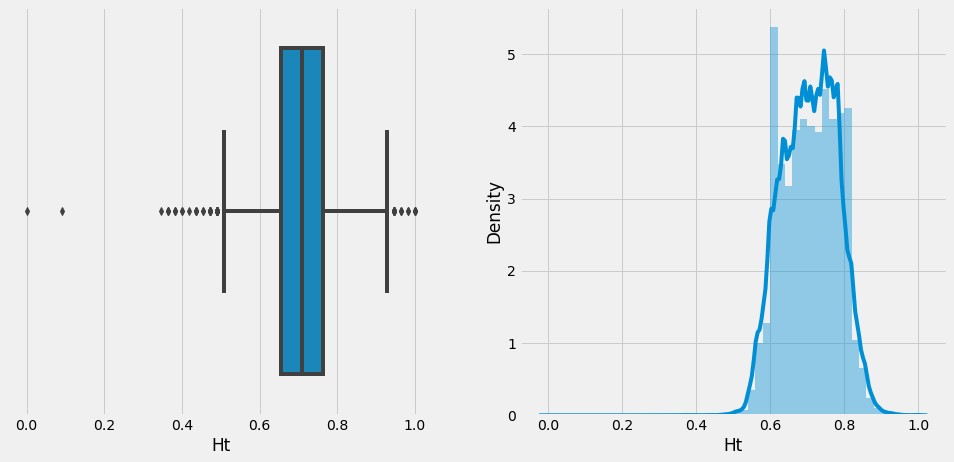

In [24]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ht', data=train,  orient='v' , ax=axes[0])
sns.distplot(train['Ht'],  ax=axes[1])

* **BMI**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

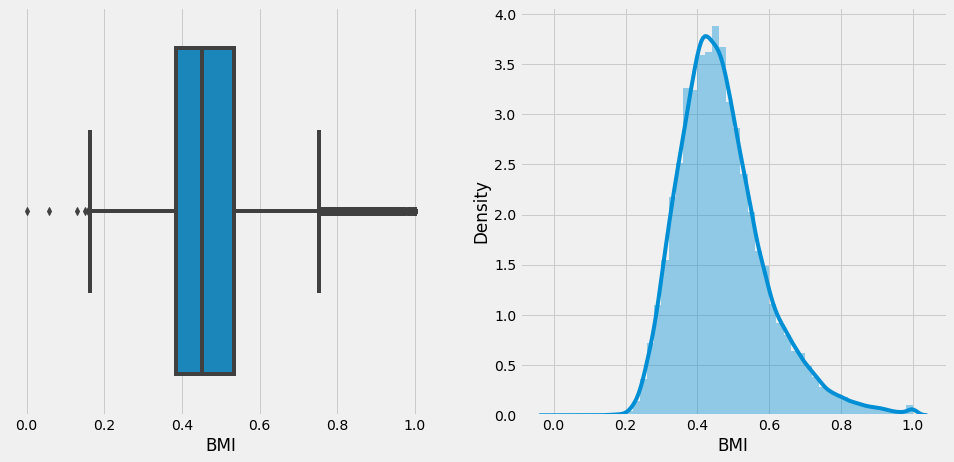

In [25]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'BMI', data=train,  orient='v' , ax=axes[0])
sns.distplot(train['BMI'],  ax=axes[1])

* **Age**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ins_Age', ylabel='Density'>

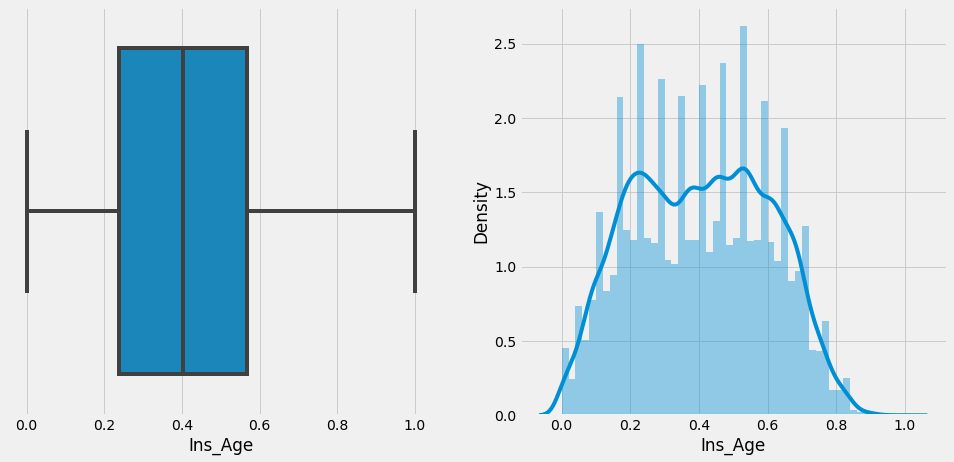

In [26]:
f,axes=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x='Ins_Age',data=train,orient='v',ax=axes[0])
sns.distplot(train['Ins_Age'],ax=axes[1])

**The image above is a comparison of a boxplot of a nearly normal distribution and the probability density function (pdf) for a normal distribution. The reason why I am showing you this image is that looking at a statistical distribution is more commonplace than looking at a box plot. In other words, it might help you understand a boxplot.**

#  **Target Variable Analysis**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


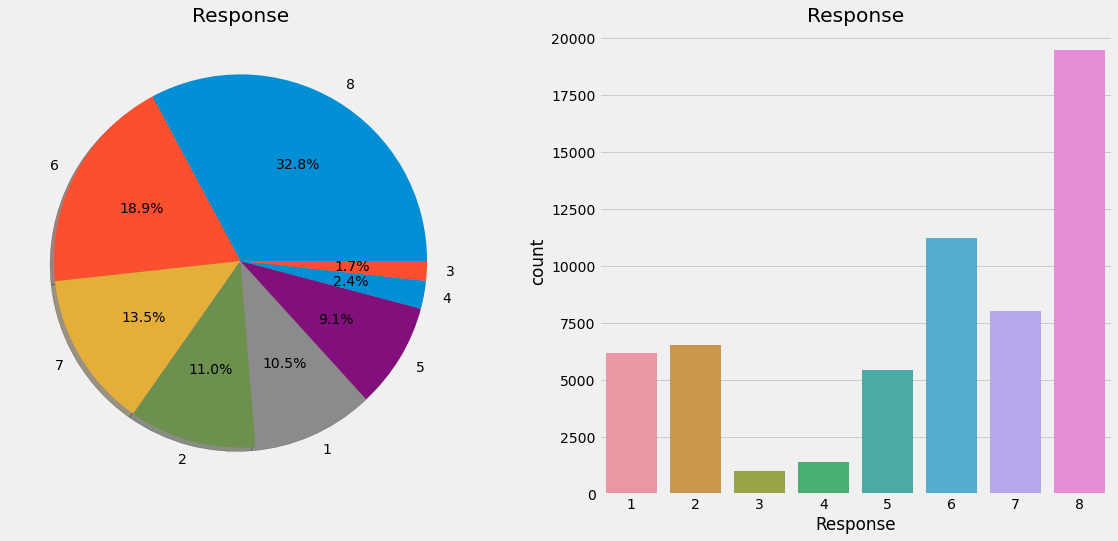

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=train,ax=ax[1])
ax[1].set_title('Response')
plt.show()

**We can see that Class 8 has the highest distribution.**

 ****Converting target variable****

**We will do a binary classification by altering the target variable. The new problem statement would be - Based on the attributes of customers, will the life insurance policy be approved or not i.e.yes(1) or no(0).we will turn this Multiclass classification challenge into Binary classification challenge.**

**We are making 0 to 7 as one class and 8 as another class**

In [28]:
#create a funtion to create a  new target variable based on conditions 

def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val

In [29]:
#create a copy of original dataset
new_data=train.copy()

In [30]:
#create a new column
new_data['Final_Response']=new_data.apply(new_target,axis=1)

In [31]:
new_data['Final_Response'].value_counts()

0    39892
1    19489
Name: Final_Response, dtype: int64

Text(0.5, 1.0, 'Distribution of rows by response categories')

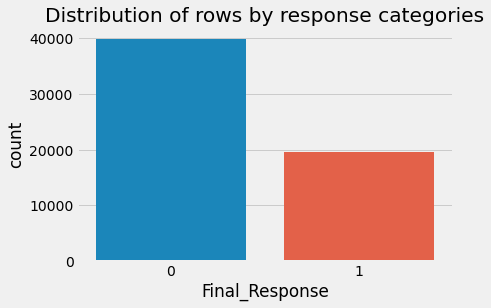

In [32]:
#distribution plot for target classes
sns.countplot(x=new_data.Final_Response).set_title('Distribution of rows by response categories')

In [33]:
#dropping already existing column
new_data.drop(['Response'],axis=1,inplace=True)
train=new_data
del new_data

In [34]:
train.rename(columns={'Final_Response':'Response'},inplace=True)

Categorizing BMI,AGE,HEIGHT and WEIGHT based on their values

In [38]:
# BMI Categorization
conditions = [
    (train['BMI'] <= train['BMI'].quantile(0.25)),
    (train['BMI'] > train['BMI'].quantile(0.25)) & (train['BMI'] <= train['BMI'].quantile(0.75)),
    (train['BMI'] > train['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

train['BMI_Wt'] = np.select(conditions, choices)

# Age Categorization
conditions = [
    (train['Ins_Age'] <= train['Ins_Age'].quantile(0.25)),
    (train['Ins_Age'] > train['Ins_Age'].quantile(0.25)) & (train['Ins_Age'] <= train['Ins_Age'].quantile(0.75)),
    (train['Ins_Age'] > train['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
train['Old_Young'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (train['Ht'] <= train['Ht'].quantile(0.25)),
    (train['Ht'] > train['Ht'].quantile(0.25)) & (train['Ht'] <= train['Ht'].quantile(0.75)),
    (train['Ht'] > train['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

train['Short_Tall'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (train['Wt'] <= train['Wt'].quantile(0.25)),
    (train['Wt'] > train['Wt'].quantile(0.25)) & (train['Wt'] <= train['Wt'].quantile(0.75)),
    (train['Wt'] > train['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

train['Thin_Fat'] = np.select(conditions, choices)

<AxesSubplot:xlabel='BMI_Wt', ylabel='count'>

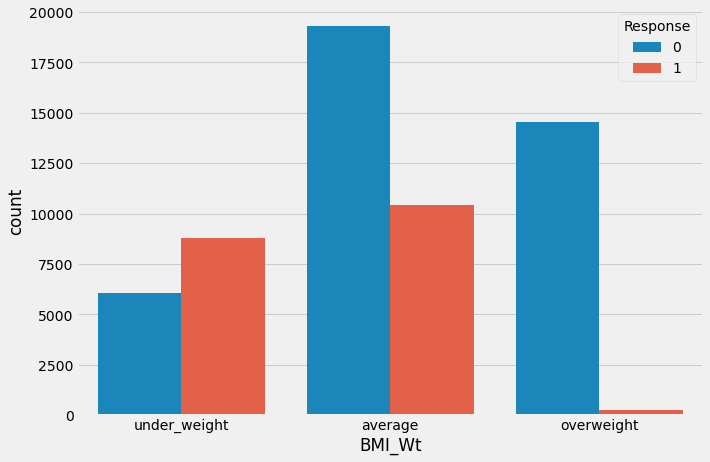

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'BMI_Wt', hue = 'Response', data = train)

Overweight policyholders are not offered standard terms.



<AxesSubplot:xlabel='Old_Young', ylabel='count'>

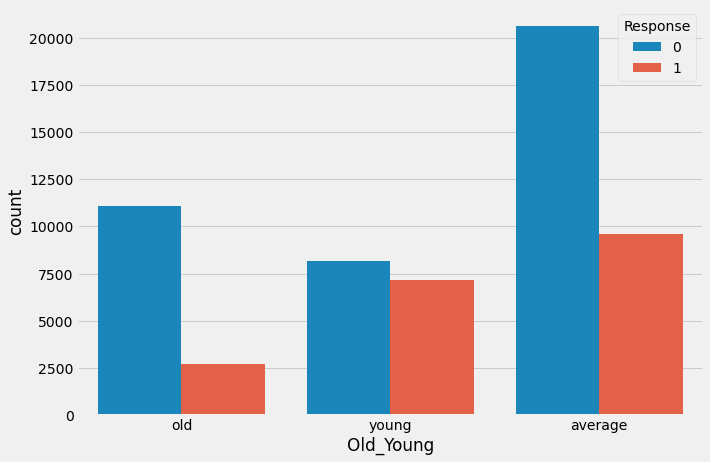

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Old_Young', hue = 'Response', data = train)

Compared to young lives and average lives, more often, old lives were not offered standard terms

<AxesSubplot:xlabel='Short_Tall', ylabel='count'>

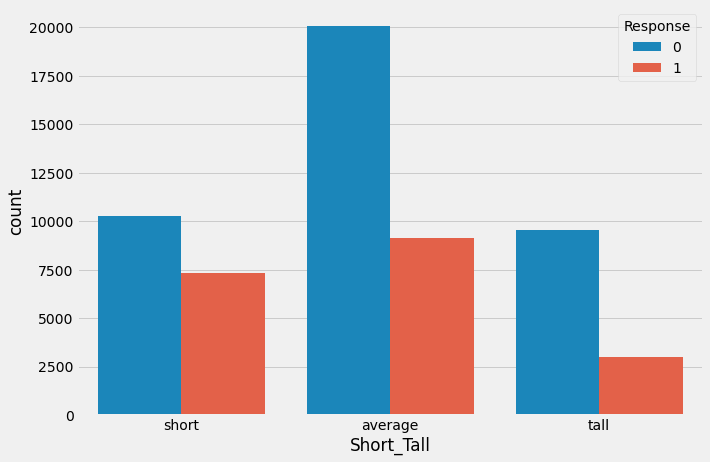

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Short_Tall', hue = 'Response', data = train)

This does not indicate any behaviour



<AxesSubplot:xlabel='Thin_Fat', ylabel='count'>

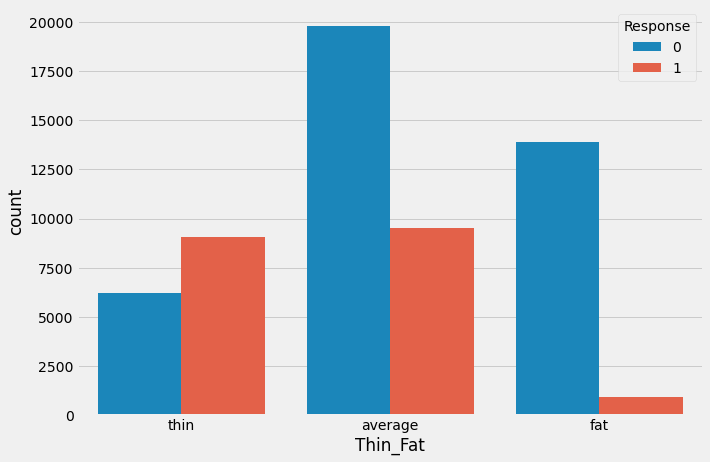

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Thin_Fat', hue = 'Response', data = train)


Fat people are not offered standard terms



**Let's get deeper into it**

In [43]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Old_Young']=='old')  or (row['Thin_Fat']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

train['extreme_risk'] = train.apply(new_target,axis=1)

<AxesSubplot:xlabel='extreme_risk', ylabel='count'>

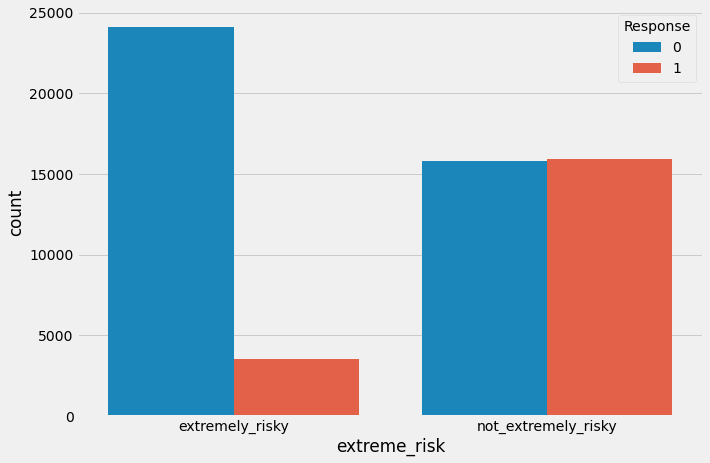

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'extreme_risk', hue = 'Response', data = train)

Under "extreme risk" category, lots of policies are getting either rejected or issued on substandard terms


In [45]:
def new_target(row):
    if (row['BMI_Wt']=='average') or (row['Old_Young']=='average')  or (row['Thin_Fat']=='average'):
        val='average'
    else:
        val='non_average'
    return val

train['average_risk'] = train.apply(new_target,axis=1)

<AxesSubplot:xlabel='average_risk', ylabel='count'>

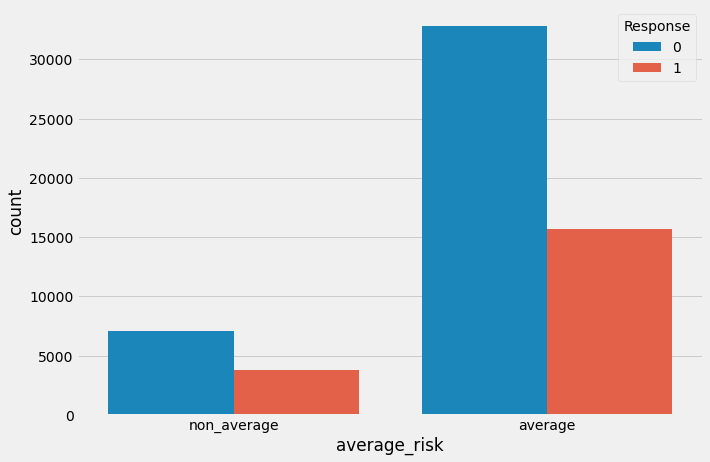

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'average_risk', hue = 'Response', data = train)

This does not indicate any behaviour

In [47]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Old_Young']=='young')  or (row['Thin_Fat']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

train['low_end_risk'] = train.apply(new_target,axis=1)

<AxesSubplot:xlabel='low_end_risk', ylabel='count'>

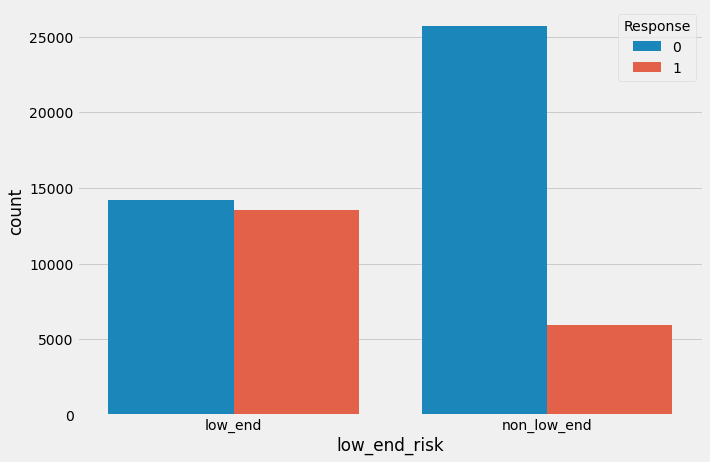

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'low_end_risk', hue = 'Response', data = train)

Under non-low-end risk category, lots of policies are either getting rejected or issued at substandard terms.

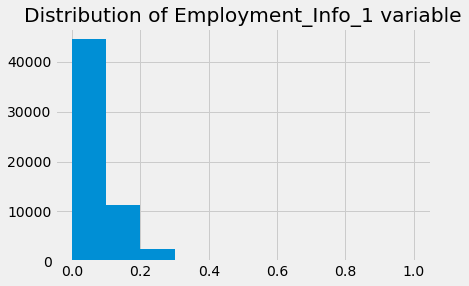

In [49]:
plt.hist(train['Employment_Info_1']);
plt.title('Distribution of Employment_Info_1 variable');

**Exploring product features**

In [50]:
train['Product_Info_1'].value_counts()

1    57816
2     1565
Name: Product_Info_1, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_1', ylabel='Density'>

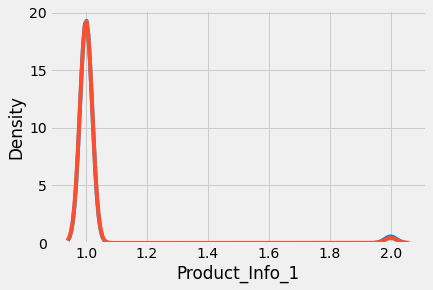

In [51]:
#product1 vs response
sns.distplot(train[train['Response']==0]['Product_Info_1'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_1'],hist=False,label='Accepted')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_2', ylabel='Density'>

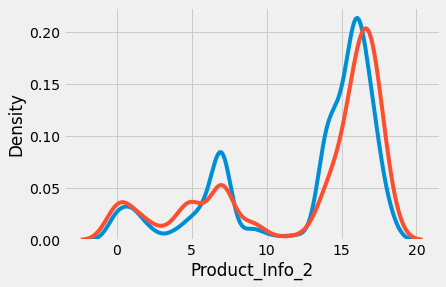

In [52]:
#product2 vs response
sns.distplot(train[train['Response']==0]['Product_Info_2'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_2'],hist=False,label='Accepted')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_3', ylabel='Density'>

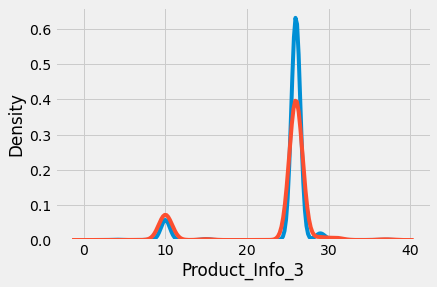

In [53]:
#product3 vs response
sns.distplot(train[train['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_3'],hist=False,label='Accepted')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_5', ylabel='Density'>

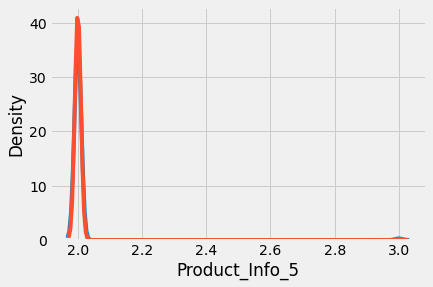

In [54]:
#product5 vs response
sns.distplot(train[train['Response']==0]['Product_Info_5'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_5'],hist=False,label='Accepted')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_6', ylabel='Density'>

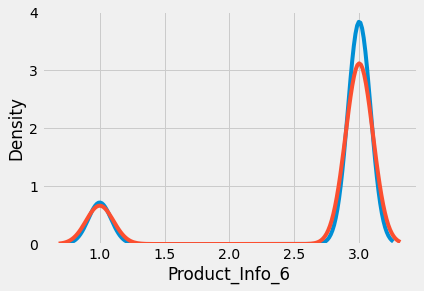

In [55]:
#product6 vs response
sns.distplot(train[train['Response']==0]['Product_Info_6'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_6'],hist=False,label='Accepted')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_7', ylabel='Density'>

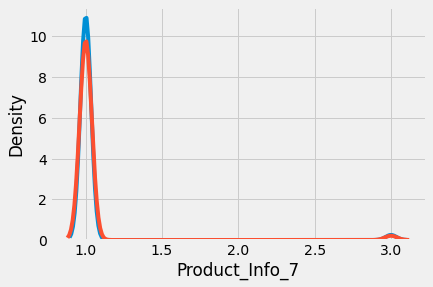

In [56]:
#product7 vs response
sns.distplot(train[train['Response']==0]['Product_Info_7'],hist=False,label='Rejected')
sns.distplot(train[train['Response']==1]['Product_Info_7'],hist=False,label='Accepted')

## Preprocessing

In [57]:
corr_with=train.corrwith(train["Response"]).sort_values(ascending=False)
print(corr_with[corr_with>0].head(20),"\n-------------------------")
print(corr_with[corr_with<0].tail(20))

Response              1.000
Medical_History_23    0.326
Medical_History_4     0.276
InsuredInfo_6         0.195
Product_Info_4        0.175
Medical_History_39    0.141
Medical_History_6     0.126
InsuredInfo_1         0.109
Medical_History_33    0.104
Family_Hist_1         0.102
Employment_Info_5     0.088
Medical_History_29    0.083
Medical_History_40    0.080
Medical_History_13    0.078
Medical_History_1     0.072
Medical_History_9     0.056
Medical_History_17    0.054
Insurance_History_4   0.050
Medical_History_27    0.047
Medical_History_34    0.045
dtype: float64 
-------------------------
Medical_Keyword_22    -0.058
InsuredInfo_2         -0.059
InsuredInfo_7         -0.064
Family_Hist_2         -0.066
Medical_Keyword_24    -0.069
Insurance_History_2   -0.073
Medical_Keyword_1     -0.075
Medical_History_30    -0.094
Product_Info_3        -0.095
Family_Hist_4         -0.102
Medical_Keyword_23    -0.104
Medical_History_16    -0.123
Medical_Keyword_48    -0.126
Medical_Keyword_25   

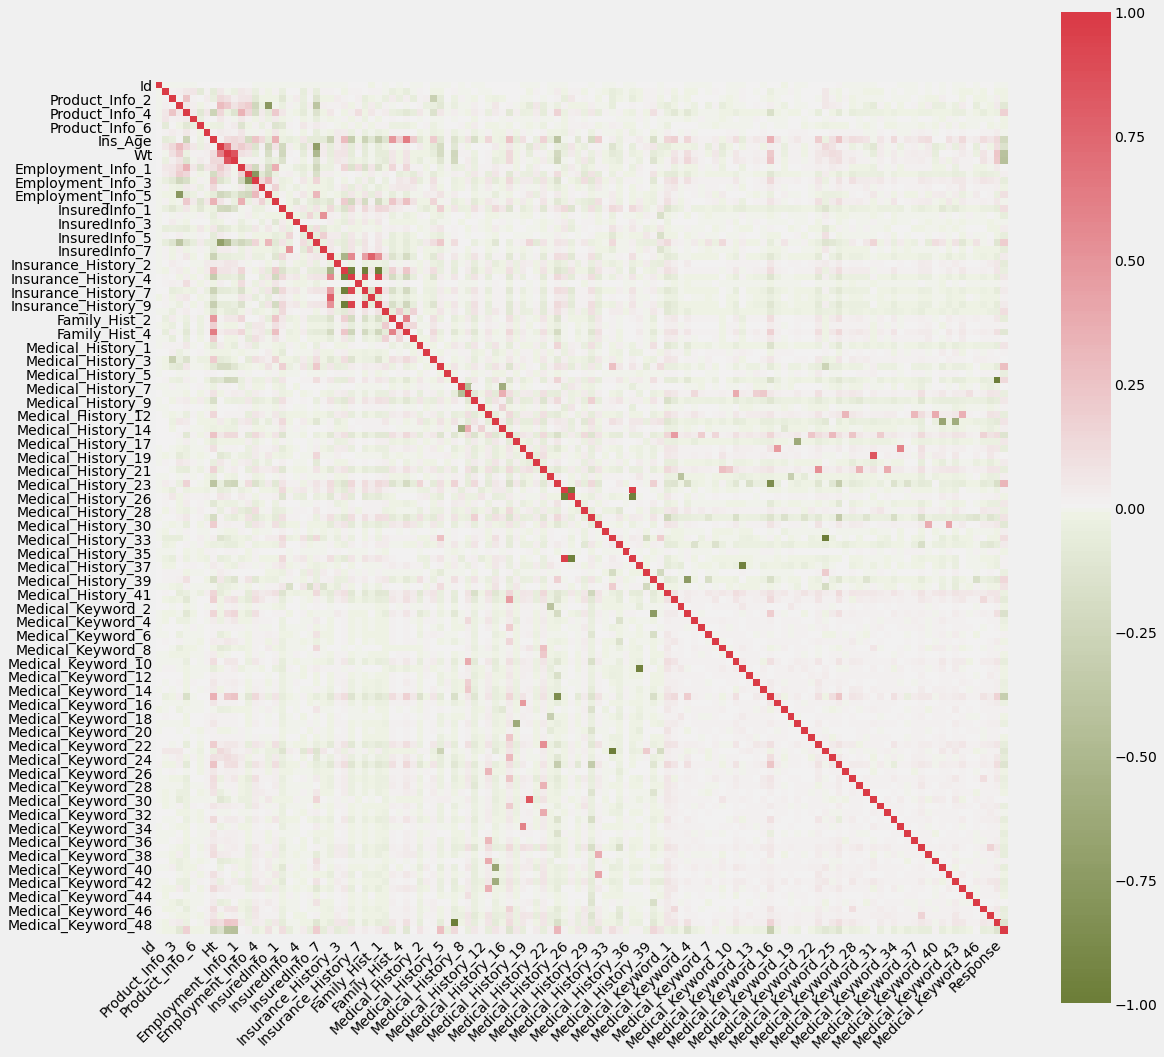

In [58]:
corr = train.corr()
plt.figure(figsize=(17,17))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 370, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [59]:
from sklearn.model_selection import train_test_split

def data_split_test_train_validation(data: pd.DataFrame, test_size:int =0.2,rand_state = 42) -> pd.DataFrame:
    # Split Train / Test
    X = data.loc[:, data.columns != "Response"]
    y = data.loc[:, "Response"]
    
    #First Split L between Train and Test 
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size= 1 - test_size,
                                                        random_state = rand_state)
    # return all splitted data sets ( 6 sets )
    print('train:', len(X_train), 'test:', len(X_test))
    return X_train, X_test,y_train, y_test

<AxesSubplot:>

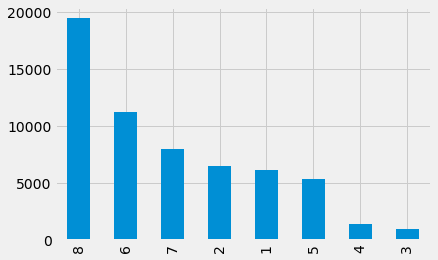

In [60]:
train_encoded.Response.value_counts().plot(kind='bar')

<AxesSubplot:>

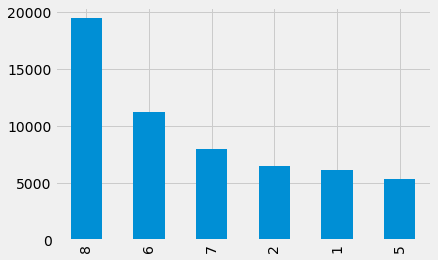

In [61]:
mask_three_to_two= (train_encoded.Response==3 )
mask_four_to_five= (train_encoded.Response==4 )
class_three=train_encoded[mask_three_to_two].copy()
class_three.loc[:,"Response"] =5
class_four=train_encoded[mask_four_to_five].copy()
class_four.loc[:,"Response"] =5
train_imbalanced = train_encoded[(mask_three_to_two ==False) & (mask_four_to_five ==False)]
train_imbalanced.Response.value_counts().plot(kind='bar')

<AxesSubplot:>

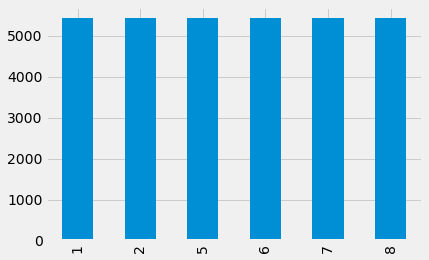

In [62]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

train_balanced =downsample(train_imbalanced, "Response")
train_balanced.Response.value_counts().plot(kind='bar')



In [63]:
X_train, X_test,y_train, y_test = data_split_test_train_validation(train_balanced, test_size=0.2)

train: 26073 test: 6519


Most Relevant Features to Target ['Family_Hist_3', 'Product_Info_2', 'Family_Hist_4', 'Medical_History_2', 'Employment_Info_6', 'Medical_History_1', 'Ht', 'Employment_Info_1', 'Id', 'Ins_Age', 'Product_Info_4', 'Wt', 'BMI']


<Figure size 720x720 with 0 Axes>

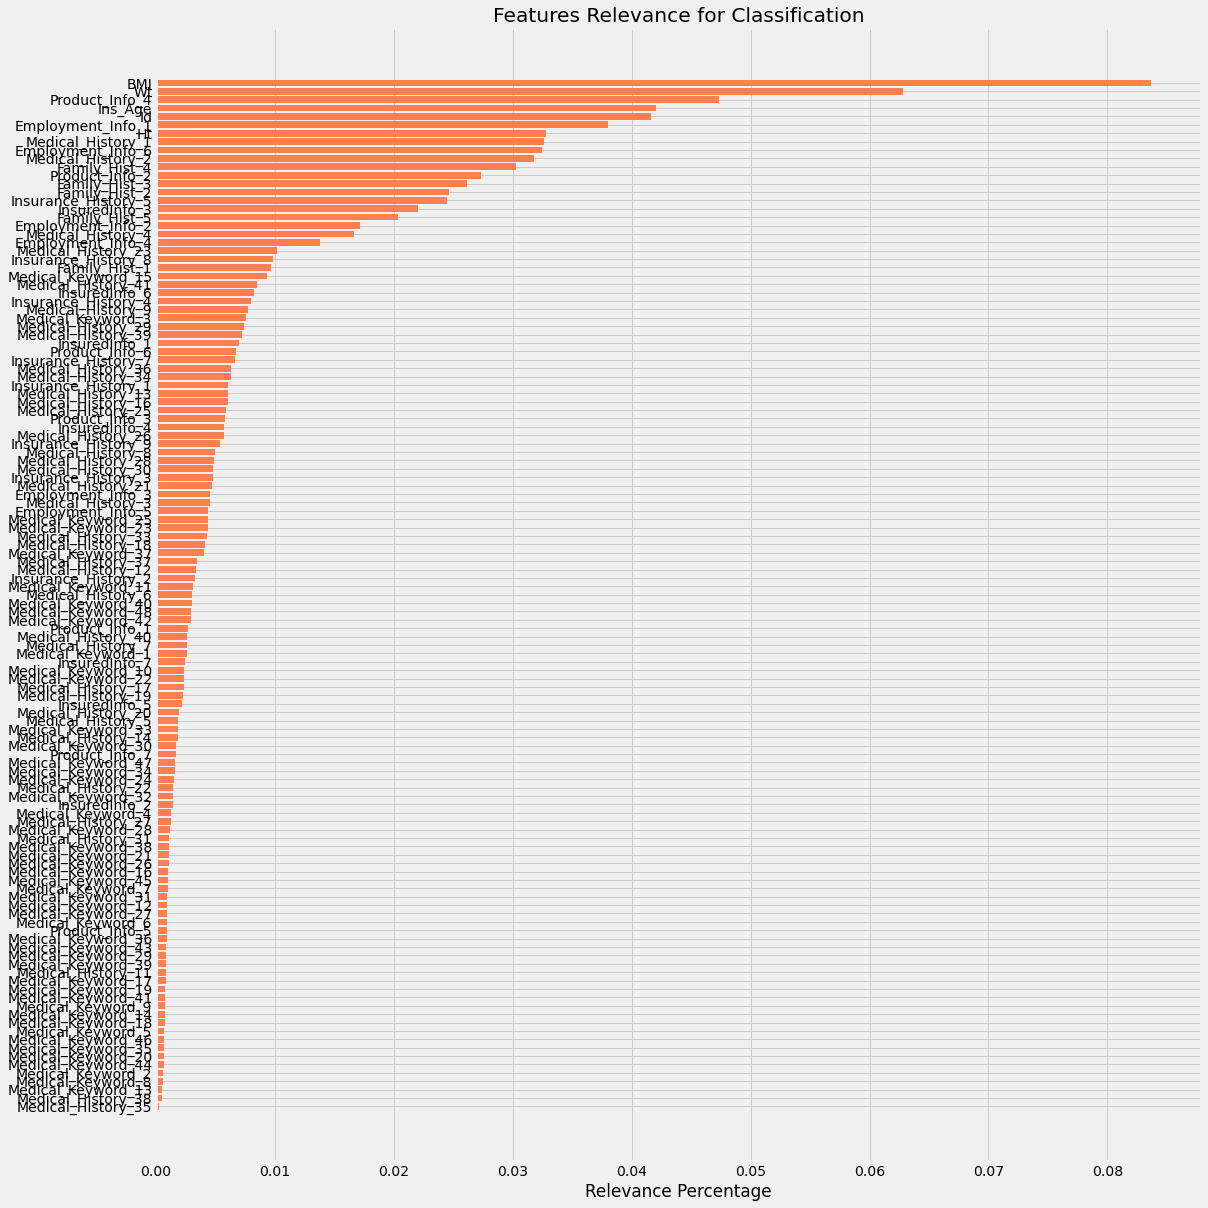

In [64]:
from sklearn.ensemble import RandomForestClassifier

feat_forest = RandomForestClassifier(n_jobs=-1)
feat_forest.fit(X=X_train, y=y_train)

plt.figure(figsize=(10, 10))
feat_imp = feat_forest.feature_importances_
cols = train.columns

feat_imp, cols = zip(*sorted(zip(feat_imp, cols)))
relevance_threshold = 0.025
feat_imp = np.array(feat_imp)
most_relevante_feat = list(cols[- np.where(feat_imp > relevance_threshold)[0].shape[0] :])

print("Most Relevant Features to Target", most_relevante_feat)
plt.figure(figsize=(17,17))
plt.barh(range(len(cols)), feat_imp, align="center", color='coral');
plt.yticks(range(len(cols)), cols)
plt.title("Features Relevance for Classification")
plt.xlabel("Relevance Percentage")
plt.tight_layout();


In [65]:
X_train[most_relevante_feat].head(10)

,Family_Hist_3,Product_Info_2,Family_Hist_4,Medical_History_2,Employment_Info_6,Medical_History_1,Ht,Employment_Info_1,Id,Ins_Age,Product_Info_4,Wt,BMI
14170,0.441,18.000,0.445,491,0.800,3.000,0.764,0.075,74132,0.672,0.231,0.492,0.731
25300,0.498,7.000,0.445,125,0.000,4.000,0.691,0.105,16384,0.537,0.097,0.199,0.326
2862,0.498,16.000,0.445,453,0.500,1.000,0.691,0.000,4502,0.657,0.077,0.347,0.588
14766,0.498,16.000,0.437,261,0.000,6.000,0.782,0.080,76369,0.313,0.641,0.425,0.604
14181,0.498,16.000,0.282,162,0.055,7.962,0.745,0.019,23540,0.299,0.128,0.504,0.778
24396,0.498,17.000,0.437,162,0.001,7.962,0.818,0.070,50947,0.179,0.487,0.320,0.410
23463,0.498,5.000,0.254,515,0.032,3.000,0.745,0.060,40535,0.194,0.231,0.362,0.547
1338,0.657,7.000,0.445,478,1.000,0.000,0.618,0.150,7423,0.821,0.128,0.157,0.308
22330,0.498,17.000,0.479,112,0.200,8.000,0.691,0.027,32210,0.463,0.077,0.331,0.559
27440,0.498,15.000,0.563,415,0.500,3.000,0.691,0.045,13185,0.537,1.000,0.205,0.337


## Modeling

In [66]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier( max_depth= 30,n_estimators= 50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred) 

array([[341, 169, 109, 139, 146, 158],
       [223, 299, 183, 135, 125, 133],
       [ 96, 124, 635, 102,  89,  72],
       [121,  83, 108, 418, 178, 135],
       [ 77,  38,  31, 168, 562, 225],
       [ 34,  19,   4,  97, 132, 811]], dtype=int64)

In [67]:
clf.score(X_test, y_test)

0.4703175333640129

In [68]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy  ', "%.2f" % (accuracy*100))
print('F1 : ', "%.2f" % (f1*100))

Accuracy   47.03
F1 :  46.02


In [69]:
from joblib import dump, load
dump(clf, '../../models/LR.joblib') 
dump((X_train, y_train, X_test, y_test), '../../models/data.joblib')

['../../models/data.joblib']